In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [3]:
# Create a 2D lattice (grid)
grid = nx.grid_2d_graph(4, 4)

# Create a ring network
ring = nx.cycle_graph(16)

# Create an Erdos-Renyi random graph
random_graph = nx.erdos_renyi_graph(16, 0.2)


In [4]:
# Compute Laplacian matrices and their eigenvalues
grid_laplacian = nx.laplacian_matrix(grid).toarray()
ring_laplacian = nx.laplacian_matrix(ring).toarray()
random_laplacian = nx.laplacian_matrix(random_graph).toarray()

grid_eigvals = np.sort(eigh(grid_laplacian, eigvals_only=True))
ring_eigvals = np.sort(eigh(ring_laplacian, eigvals_only=True))
random_eigvals = np.sort(eigh(random_laplacian, eigvals_only=True))

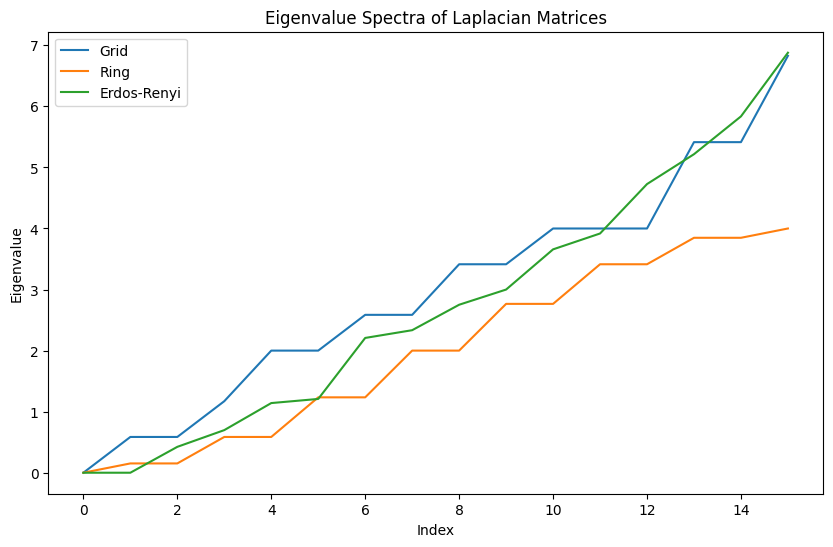

In [5]:
# Plot eigenvalue spectra
plt.figure(figsize=(10, 6))
plt.plot(grid_eigvals, label='Grid')
plt.plot(ring_eigvals, label='Ring')
plt.plot(random_eigvals, label='Erdos-Renyi')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.title('Eigenvalue Spectra of Laplacian Matrices')
plt.show()


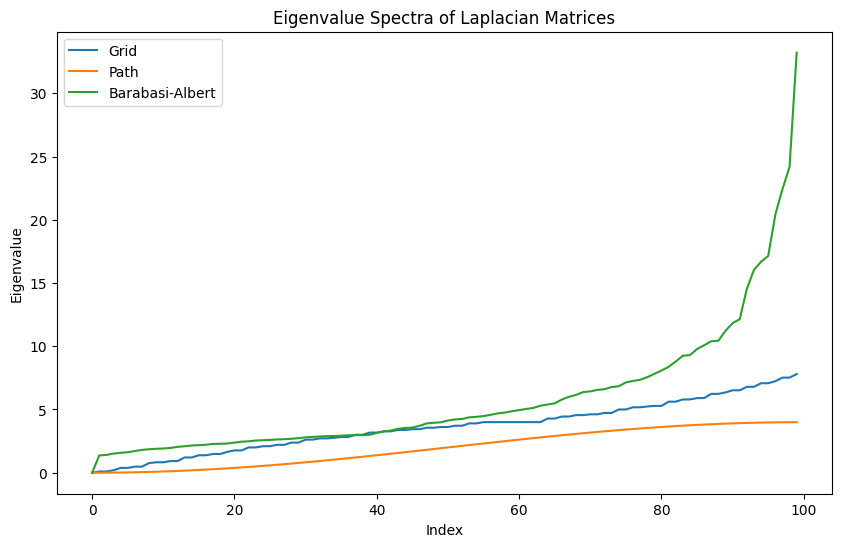

In [6]:
grid = nx.grid_2d_graph(10, 10)

# Create a path network
path = nx.path_graph(100)

# Create a Barabasi-Albert preferential attachment network
ba = nx.barabasi_albert_graph(100, 3)

# Compute Laplacian matrices and their eigenvalues
grid_laplacian = nx.laplacian_matrix(grid).toarray()
path_laplacian = nx.laplacian_matrix(path).toarray()
ba_laplacian = nx.laplacian_matrix(ba).toarray()

grid_eigvals = np.sort(eigh(grid_laplacian, eigvals_only=True))
path_eigvals = np.sort(eigh(path_laplacian, eigvals_only=True))
ba_eigvals = np.sort(eigh(ba_laplacian, eigvals_only=True))

# Plot eigenvalue spectra
plt.figure(figsize=(10, 6))
plt.plot(grid_eigvals, label='Grid')
plt.plot(path_eigvals, label='Path')
plt.plot(ba_eigvals, label='Barabasi-Albert')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.title('Eigenvalue Spectra of Laplacian Matrices')
plt.show()

In [7]:
grid_laplacian.shape

(100, 100)

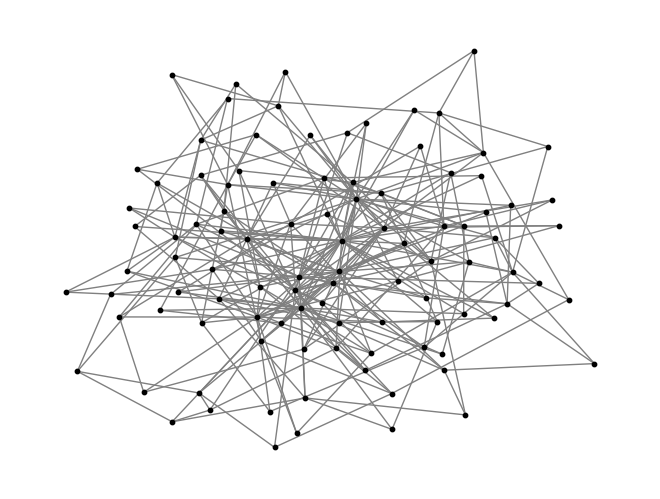

In [8]:
nx.draw(ba, node_size=10, node_color='black', edge_color='gray')

In [9]:
slice10_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_ca3_to_slice10_synaptome.npz'
slice15_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_ca3_to_slice15_synaptome.npz'
slice20_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_ca3_to_slice20_synaptome.npz'

In [10]:
from scipy import sparse

slice10 = sparse.load_npz(slice10_path)
slice15 = sparse.load_npz(slice15_path)
slice20 = sparse.load_npz(slice20_path)


In [14]:
slice10_internal = slice10[:slice10.shape[1],:]
slice15_internal = slice15[:slice15.shape[1],:]
slice20_internal = slice20[:slice20.shape[1],:]

In [15]:
#read npz file in networkx
slice10 = nx.from_scipy_sparse_array(slice10_internal)
slice15 = nx.from_scipy_sparse_array(slice15_internal)
slice20 = nx.from_scipy_sparse_array(slice20_internal)

In [16]:
def get_laplacian_matrix(graph):
    laplacian = nx.laplacian_matrix(graph).toarray()
    eigvals = np.sort(eigh(laplacian, eigvals_only=True))
    return eigvals

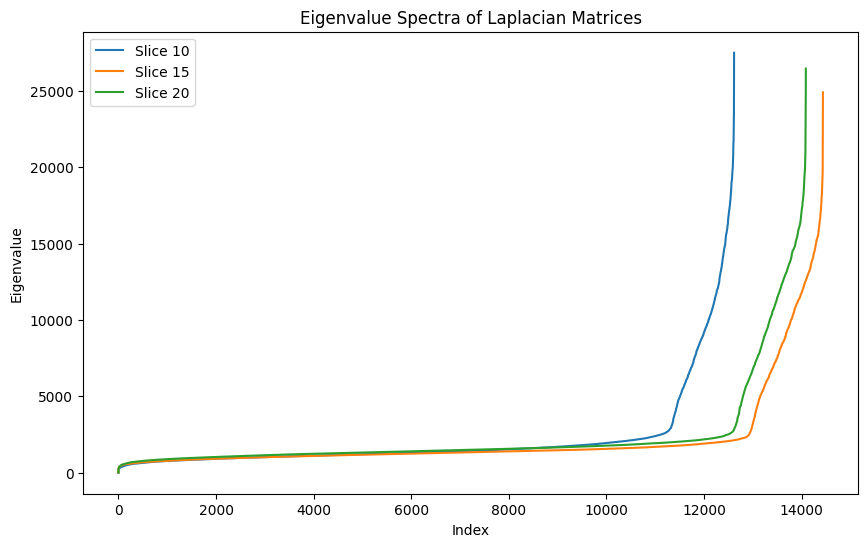

In [17]:
# plot eigenvalue spectra
plt.figure(figsize=(10, 6))
plt.plot(get_laplacian_matrix(slice10), label='Slice 10')
plt.plot(get_laplacian_matrix(slice15), label='Slice 15')
plt.plot(get_laplacian_matrix(slice20), label='Slice 20')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.title('Eigenvalue Spectra of Laplacian Matrices')
plt.show()

In [25]:
slice10.number_of_nodes()

12615

In [26]:
# print number of nodes and edges
print('Number of nodes in slice 10: ', slice10.number_of_nodes())
print('Number of edges in slice 10: ', slice10.number_of_edges())
print('Number of nodes in slice 15: ', slice15.number_of_nodes())
print('Number of edges in slice 15: ', slice15.number_of_edges())
print('Number of nodes in slice 20: ', slice20.number_of_nodes())
print('Number of edges in slice 20: ', slice20.number_of_edges())

Number of nodes in slice 10:  12615
Number of edges in slice 10:  2634344
Number of nodes in slice 15:  14435
Number of edges in slice 15:  2909134
Number of nodes in slice 20:  14085
Number of edges in slice 20:  3263288


In [29]:
import networkx as nx
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Assuming you have a function to calculate your metric
def calculate_metric(G):
    L = nx.normalized_laplacian_matrix(G).A
    eigvals = np.sort(np.linalg.eigvals(L))
    return eigvals

# Your original graph
G_original = slice10

# Number of randomizations
N = 1000

# Calculate the metric for the original graph
original_metric = calculate_metric(G_original)

# Generate N random graphs and calculate their metrics
random_metrics = []
for _ in range(N):
    G_random = nx.gnm_random_graph(G_original.number_of_nodes(), G_original.number_of_edges())
    random_metric = calculate_metric(G_random)
    random_metrics.append(random_metric)

# Calculate p-values for each eigenvalue
p_values = [ttest_1samp([rm[i] for rm in random_metrics], original_metric[i]).pvalue for i in range(G_original.number_of_nodes())]

# Correct for multiple comparisons using Bonferroni correction
corrected_p_values = [min(p*N, 1) for p in p_values]

# Print corrected p-values
print("Corrected p-values:", corrected_p_values)

# Plot the eigenvalue spectrum of the original graph and the average of the random graphs
plt.figure(figsize=(10, 6))
plt.plot(np.mean(random_metrics, axis=0), label='Average of random graphs')
plt.plot(original_metric, label='Original graph')
plt.legend()
plt.show()


/gpfs/bbp.cscs.ch/home/kurban/venv2022/lib/python3.8/site-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(
